In [ ]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
BATCH_SIZE = 32
IMAGE_SIZE = (299, 299)  # Updated image size
EPOCHS = 20  # Increased number of epochs

# Define data directory
data_directory = "/content/drive/MyDrive/PlantVillage"

# Create an instance of the ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20% of the height
    horizontal_flip=True,  # Randomly flip images horizontally
    validation_split=0.1  # Split the dataset into training and validation sets (adjusted)
)

# Create training and validation data generators
train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # for classification tasks
    subset='training'  # specify 'training' or 'validation'
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    data_directory,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,  # Set shuffle to False for the test dataset
)
# Define the base model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

for layer in base_model.layers:
    layer.trainable = False

# Add a custom output layer for your classification task
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
output = layers.Dense(3, activation='softmax')(x)  # Replace 3 with the number of classes in your dataset

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    verbose=1
)


Found 1937 images belonging to 3 classes.
Found 215 images belonging to 3 classes.
Found 2152 images belonging to 3 classes.
Epoch 1/20
61/61 [==============================] - 61s 908ms/step - loss: 0.6277 - accuracy: 0.7388 - val_loss: 0.4196 - val_accuracy: 0.8558
Epoch 2/20
61/61 [==============================] - 57s 922ms/step - loss: 0.3611 - accuracy: 0.8813 - val_loss: 0.3027 - val_accuracy: 0.9070
Epoch 3/20
61/61 [==============================] - 54s 883ms/step - loss: 0.2754 - accuracy: 0.9153 - val_loss: 0.2793 - val_accuracy: 0.9116
Epoch 4/20
61/61 [==============================] - 54s 880ms/step - loss: 0.2280 - accuracy: 0.9288 - val_loss: 0.2352 - val_accuracy: 0.8977
Epoch 5/20
61/61 [==============================] - 56s 927ms/step - loss: 0.2027 - accuracy: 0.9334 - val_loss: 0.2003 - val_accuracy: 0.9349
Epoch 6/20
61/61 [==============================] - 54s 887ms/step - loss: 0.1829 - accuracy: 0.9411 - val_loss: 0.2125 - val_accuracy: 0.9209
Epoch 7/20
61/61 

In [ ]:
# Evaluate the model on the test dataset
scores = model.evaluate(test_generator)

# Print the test set performance (you can also display or save these values as needed)
print(f'Test Loss: {scores[0]}')
print(f'Test Accuracy: {scores[1]}')


68/68 [==============================] - 10s 147ms/step - loss: 0.1076 - accuracy: 0.9638
Test Loss: 0.10761333256959915
Test Accuracy: 0.9637546539306641


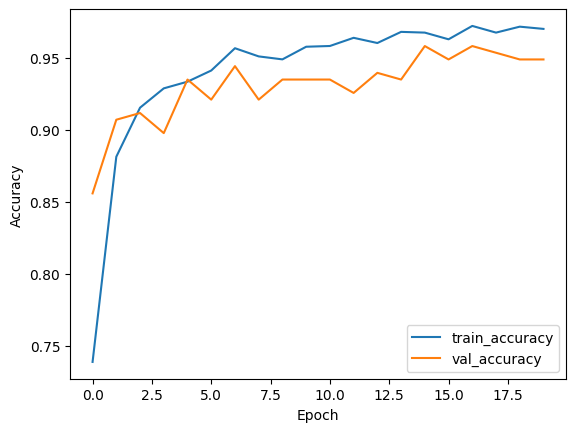

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

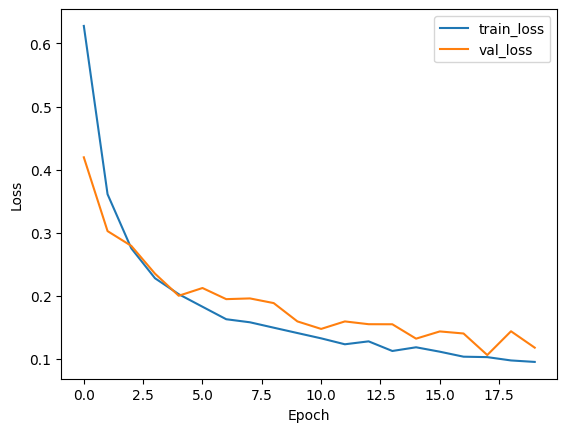

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

68/68 [==============================] - 15s 178ms/step
Classification Report:
                        precision    recall  f1-score   support

Potato___Early_blight       0.97      0.99      0.98      1000
 Potato___Late_blight       0.96      0.97      0.96      1000
     Potato___healthy       0.95      0.75      0.84       152

             accuracy                           0.96      2152
            macro avg       0.96      0.90      0.93      2152
         weighted avg       0.96      0.96      0.96      2152



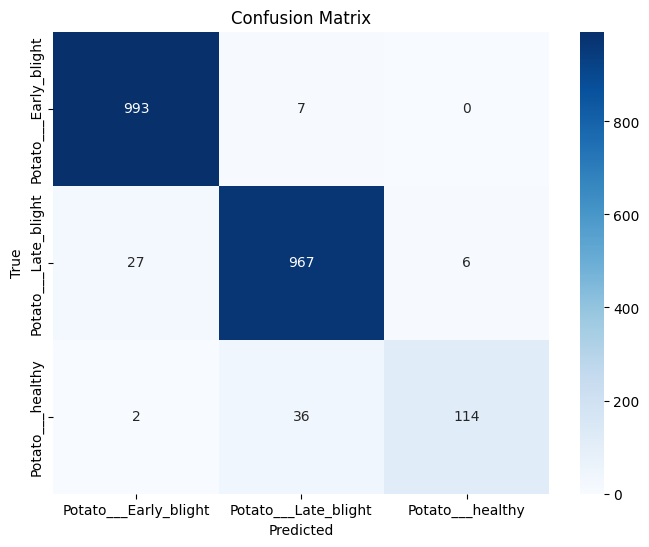

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test dataset
test_predictions = model.predict(test_generator)
y_pred = np.argmax(test_predictions, axis=1)
y_true = test_generator.classes

# Calculate precision, recall, and F1-score
class_labels = list(test_generator.class_indices.keys())
classification_rep = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n", classification_rep)

# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
